In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Приручая временные ряды

Временной ряд это набор наблюдений (data points), собранных в последовательные моменты времени, обычно отстоящие друг от друга на равные промежутки времени. Например, замеры температуры каждый час, курса доллара каждый день и т.д.

## Импортирование и визуализация временных рядов

В этом модуле мы снова рассмотрим датасет "bikes", но в этот раз мы посмотрим на него как на временной ряд.

* Загрузите данные из файла `data/bikes.csv`,
* укажите, что колонку `'dates'` необходимо отпарсить как даты, используйте `parse_dates=['dates']` и
* используйте даты как индекс.

Проверьте, используя метод `.head()`, что все правильно, и
* постройте график значения температуры от времени. Для этого можно использовать или собственные инструменты библиотеки `pandas`, а именно `bikes.plot(...)`, или напрямую `matplotlib`.

In [2]:
bikes = pd.read_csv('data/bikes.csv', parse_dates=['date'], index_col='date')
bikes.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,2.716070,45.715346,21.414957,120.0
2011-01-04,2.896673,54.267219,15.136882,108.0
2011-01-05,4.235654,45.697702,17.034578,82.0
2011-01-06,3.112643,50.237349,10.091568,88.0
2011-01-07,2.723918,49.144928,15.738204,148.0


<AxesSubplot:xlabel='date'>

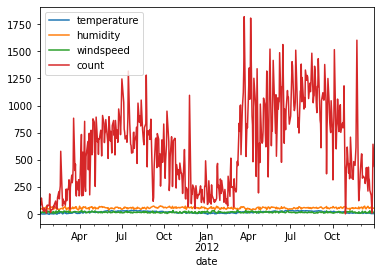

In [3]:
bikes.plot()

### Упражнение: постройте график только значений температуры

На графике выше сложно увидеть величину именно температуры. Постройте график, на котором на оси `y` будут только значения температуры.

<AxesSubplot:xlabel='date'>

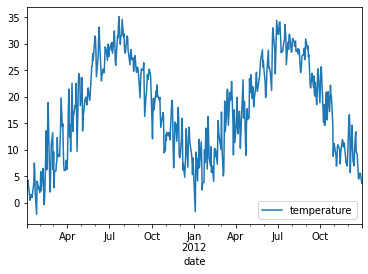

In [4]:
# место для кода
bikes.plot(y='temperature')

<AxesSubplot:xlabel='date'>

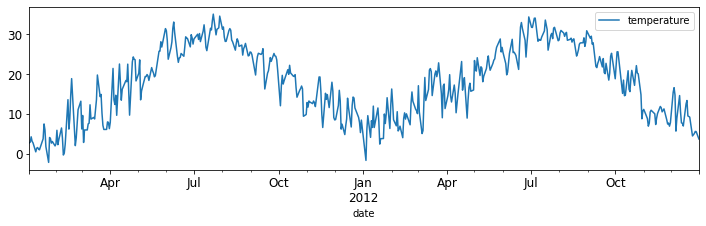

In [5]:
# место для кода
bikes.plot(y='temperature', figsize=(12, 3), fontsize=12)

### Упражнение: количество велосипедов в некоторый месяц

Из графика выше вы можете увидеть, что данные покрывают период в два года и что просматривается некоторое (вполне ожидаемое) сходство значений температуры между годами.

Можно выбрать данные по дате. Например, можно выбрать данные только по январю 2012 года и посмотреть, сколько велосипедов в сумме было арендовано в этот месяц. Сравните это значение с аналогичным по августу 2012 года.

In [6]:
jan_start = pd.Timestamp("1st January 2012")
jan_end = pd.Timestamp("31st January 2012")
bikes_jan = bikes[jan_start:jan_end]['count'].sum()

# место для кода
aug_start = pd.Timestamp(2012, 8, 1)
aug_end = pd.Timestamp(2012, 8, 31)
bikes_aug = bikes[aug_start:aug_end]['count'].sum()

print("{0:.0f} bikes in January vs {1:.0f} bikes in August.".format(bikes_jan, bikes_aug))

5939 bikes in January vs 37025 bikes in August.


## Resampling (передискретизация)

Мы можем перестроить временной ряд таким образом, что более мелкие временные интервалы будут объединены в более крупные (например, часы в дни, дни в месяцы и тд.). Этот приём называется resampling (передискретизация).

* используйте метод `.resample` для того, чтобы собрать средние значения по месяцам
* постройте график получившегося временного ряда

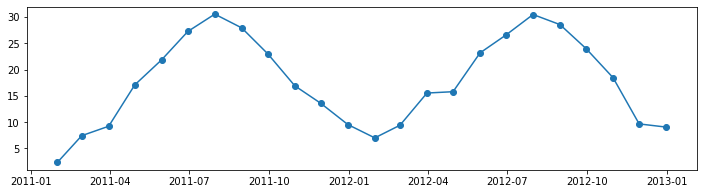

In [7]:
bikes_monthly = bikes.resample('M').mean()

plt.figure(figsize=(12, 3))
plt.plot(bikes_monthly.temperature, "-o")

### Упражнение: сделайте resampling по среднему недельному значению и постройте график величины влажности (humidity)

<AxesSubplot:xlabel='date'>

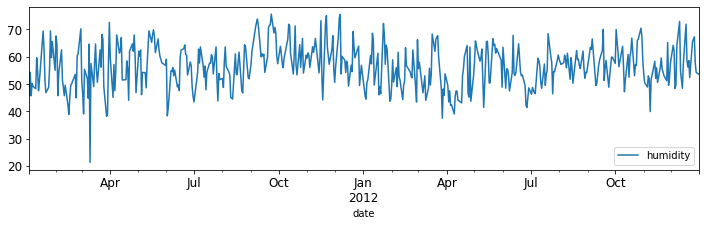

In [8]:
bikes.plot(y='humidity', figsize=(12, 3), fontsize=12)

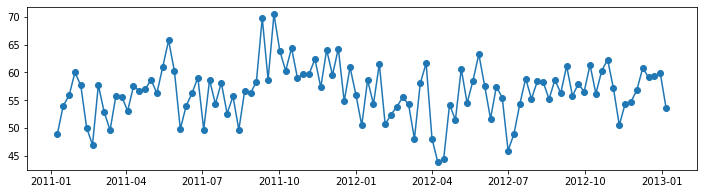

In [9]:
# место для кода
bikes_weeks = bikes.resample('W').mean()

# построение графика
plt.figure(figsize=(12, 3))
plt.plot(bikes_weeks.humidity, "-o")

## Парсинг нестандартных форматов представления времени

Когда мы загрузили датасет по велосипедам, Pandas автоматически распознал формат дат. Обычно этого достаточно и это работает надежно, но могут быть случаи, когда разбирать ("парсить") даты и время приходится самостоятельно.

Загрузите данные `NZAlcoholConsumption` (не указывая, какая именно колонка считается датой) и посмотрите на данные.

In [10]:
alcohol_consumption = pd.read_csv('data/NZAlcoholConsumption.csv')
alcohol_consumption.head()

,DATE,TotalBeer,TotalSpirits,TotalWine
0,2004Q3,3.135,1.746,2.318
1,2000Q1,2.957,1.097,1.486
2,2006Q1,3.027,1.443,2.141
3,2000Q3,2.798,1.496,1.844
4,2011Q3,2.865,2.482,2.704


Датасет содержит данные, агрегированные по кварталам. Время закодировано строкой, в которой первые четыре символа представляют собой год, а последние два -- квартал года.
Чтобы преобразовать закодированное таким образом время в даты, с которыми pandas умеет работать напрямую, можно написать специальную функцию.


### Упражнение: парсинг кварталов

Напишите функцию `parse_quarter`, которая принимает на вход строку в формате `YYYYQN` и преобразует её в объект типа `pandas.Timestamp`. Преобразуйте значения кварталов по следующему правилу:

* Q1 --> mar 31
* Q2 --> jun 30
* Q3 --> sep 20
* Q4 --> dec 31

In [11]:
import re

In [12]:
# убедитесь, что это работает
def parse_quarter(string):
    """
    Converts a string from the format YYYYQN in datetime object at the end of quarter N.
    """
    
    # Note: you could also just retrieve the first four elements of the string
    # and the last one... Regex is fun but often not necessary
    year, qn = re.search(r'^(20[0-9][0-9])(Q[1-4])$', string).group(1, 2)
    
    # year and qn will be strings, pd.datetime expects integers.
    year = int(year)
    
    date = None
    
    if qn=='Q1':
        date = pd.Timestamp(year, 3, 31)
    elif qn=='Q2':
        date = pd.Timestamp(year, 6, 30)
    elif qn=='Q3':
        date = pd.Timestamp(year, 9, 20)
    else:
        date = pd.Timestamp(year, 12, 31)
        
    return date

print(parse_quarter("2000Q3")) # should show 2000-09-20 00:00:00

2000-09-20 00:00:00


### Как передать пользовательские функции в методы pandas

Библиотека Pandas может распарсить даты используя пользовательскую функцию, как та, которую вы написали выше. Для этого надо передать эту функцию через опцию `date_parser`.

In [13]:
# загружаем данные повторно, на этот раз используя пользовательский парсер для дат
alcohol_consumption = pd.read_csv('data/NZAlcoholConsumption.csv', 
                                  parse_dates=['DATE'], 
                                  date_parser=parse_quarter,
                                  index_col='DATE')
alcohol_consumption.sort_index(inplace=True)
alcohol_consumption.head()

,TotalBeer,TotalSpirits,TotalWine
DATE,,,
2000-03-31,2.957,1.097,1.486
2000-06-30,2.823,1.309,1.915
2000-09-20,2.798,1.496,1.844
2000-12-31,3.997,1.810,2.808
2001-03-31,3.037,1.240,1.287


### Упражнение: построение графика временного ряда

А сейчас посмотрите на потребление вина ("wine") и пива ("beer"), отобразите оба явления на одном и том же графике. Обсудите эти временные ряды.

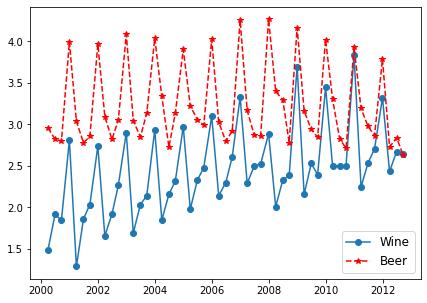

In [14]:
# место для кода
plt.figure(figsize=(7, 5))
plt.plot(alcohol_consumption['TotalWine'], 
         '-o', label='Wine')
plt.plot(alcohol_consumption['TotalBeer'], 
         '--*', label='Beer', color="red")
plt.legend(fontsize=12)

Из графика видно, что оба временных ряда имеют некоторое сходство в аспекте **сезонности**, но демонстрируют разные **тренды (тенденции)**. Оба ряда характеризуются максимумом в последний квартал года и минимумом как правило во втором квартале.
Потребление пива в среднем кажется стабильным на протяжении лет, представленных в датасете. В то же время видно, что потребление вина уверенно растет из года в год. Минздрав бьёт тревогу.

### Упражнение: выполните resampling данных по годам (12 месяцев)

Мы можем пересобрать (resample) данные, укрупнив интервал до одного года (12 месяцев), и тогда тренд, возможно, будет виден лучше.

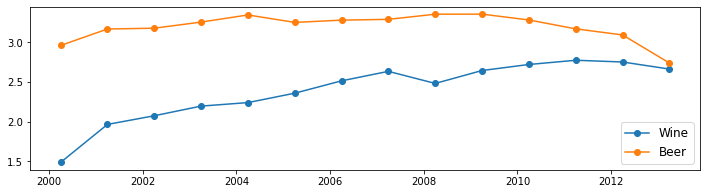

In [15]:
# место для кода
alc_yearly = alcohol_consumption.resample('12M').mean()

# построение графика
plt.figure(figsize=(12, 3))
plt.plot(alc_yearly.TotalWine, "-o", label="Wine")
plt.plot(alc_yearly.TotalBeer, "-o", label="Beer")
plt.legend(fontsize=12)

## Скользящее окно

Далее мы изучим эффект от использования "скользящего среднего" (англ. rolling average). Метод заключается в том, что мы берем некоторое количество последовательно расположенных наблюдений, вычисляем их среднее значение и заменяем всё окно этим вычисленным значением. Для подмены используется или самая правое наблюдение или центральное наблюдение окна.

* испольуйте метод `rolling` объекта `pd.Series` ([документация](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling))
* укажите окно размера 4
* постройте график исходного временного ряда и скользящего среднего. Что вы видите?


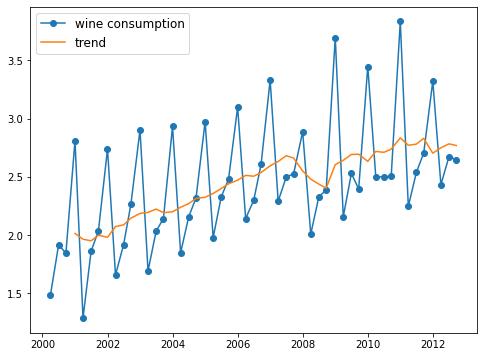

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine,
         '-o', label='wine consumption')
rolling_mean = alcohol_consumption.TotalWine.rolling(window=4).mean()
plt.plot(rolling_mean, label='trend')
plt.legend(fontsize=12);

Похоже, что кривая среднего значение неплохо улавливает **тренд** и нивелирует **сезонные** колебания.
Подобная кривая позволяет лучше увидеть общее увеличение в уровне потребления вина, наблюдаемое с течением времени, а также "провал" в уровне потребления в 2008 году.

Лучше понять скользящее среднее помогут *виджеты*. Посмотрите код в клетке ниже и измените его по желанию.

In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def rolling_avg_plot(window_size):
    plt.plot(alcohol_consumption.TotalWine, 
             '-o', label='wine consumption')
    rolling = alcohol_consumption.TotalWine.rolling(window=window_size).mean()
    plt.plot(rolling, label='trend')
    plt.legend();
    plt.show()

interact(rolling_avg_plot, window_size=(0, 10));

interactive(children=(IntSlider(value=5, description='window_size', max=10), Output()), _dom_classes=('widget-…

### Упражнение: постройте график скользящей суммы с окном ширины 4

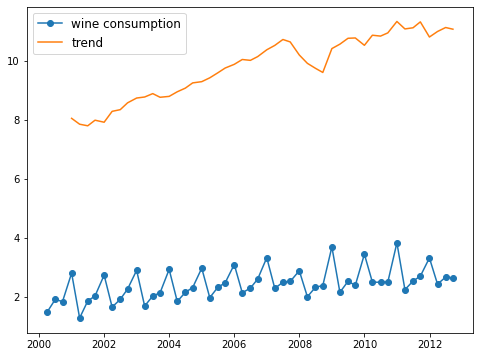

In [18]:
# место для кода
plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine,
         '-o', label='wine consumption')
rolling_mean = alcohol_consumption.TotalWine.rolling(window=4).sum()
plt.plot(rolling_mean, label='trend')
plt.legend(fontsize=12);

## Сдвиг временного ряда


Ниже показано, как можно сдвинуть (англ. shift) весь датасет на некоторый промежуток времени. Попробуйте изменить значение параметра `periods` (допускаются отрицательные значения).

Обратите внимание, что параметр `freq` необходим, если вы хотите, чтобы датасет был автоматически расширен. Если не указать этот параметр, то график останется в границах первоначального временного ряда.

`3M` это псевдоним отступа (англ. offset alias), о котором вы можете почитать [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

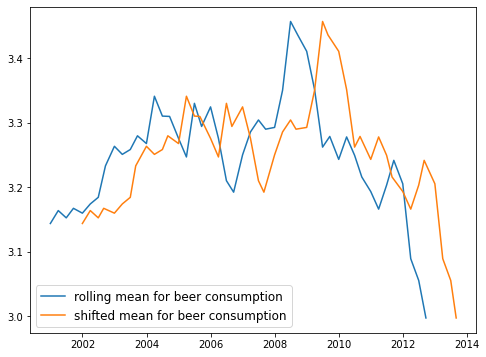

In [19]:
plt.figure(figsize=(8, 6))
rolling_mean = alcohol_consumption.TotalBeer.rolling(window=4).mean()
shifted_rm = rolling_mean.shift(periods = 4, freq="3M")
plt.plot(rolling_mean, label='rolling mean for beer consumption')
plt.plot(shifted_rm, label='shifted mean for beer consumption')
plt.legend(fontsize=12);

## Дифференцирование (вычисление разностей)

Прием differencing (вычисление разностей, дифференцирование) сводится к построению такого временного ряда, в котором наблюдения представляют собой разность (англ. difference) между двумя другими наблюдениями временного ряда, разделенными некоторым интервалом:

$y'_t = y_t-y_{t-1}$

для интервала равного 1 временной единице.

Постройте график временного ряда `TotalWine` и дифференцированного временного ряда (с интервалом равным одной временной единице). Опишите, что вы видите.

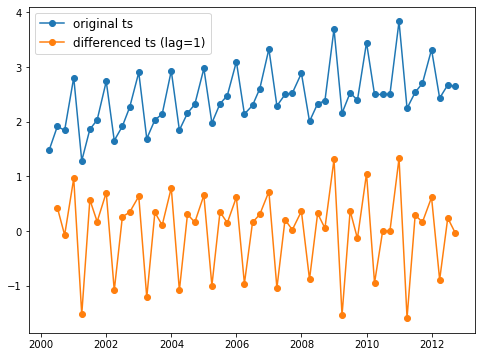

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine, '-o', 
         label="original ts")
plt.plot(alcohol_consumption.TotalWine.diff(1), '-o', 
         label="differenced ts (lag=1)")
plt.legend(fontsize=12)

Чтобы получить представление, каким может быть подходящий интервал, выполните нижеприведенный код и проанализируйте результат. Хотя в данном случае, вы скорей всего уже поняли, что хорошим значеним интервала будет `4`.

In [21]:
def differencing_plot(d):
    differenced_ts = alcohol_consumption.TotalWine.diff(d)
    plt.plot(differenced_ts, '-o')
    plt.show()

interact(differencing_plot, d=(1, 10));

interactive(children=(IntSlider(value=5, description='d', max=10, min=1), Output()), _dom_classes=('widget-int…

## Автокорреляция

Автокоррелиция измеряет величину корреляции (сходства) между временным рядом и этим же временным рядом, взятым с некоторым сдвигом или "запаздыванием" (англ. lag)

* используйте метод `autocorr` (описанный [здесь](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.autocorr.html)), чтобы вычислить автокорреляцию для величин запаздывания от 1 до 13
* отобразите значения автокорреляции на графике вида stem plot (`plt.stem`).

Опишите, что вы видите.

Text(0, 0.5, 'Autocorrelation')

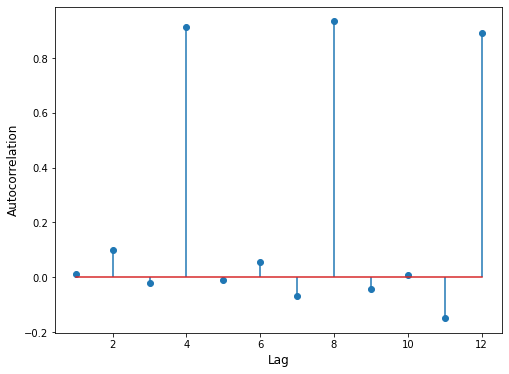

In [22]:
lags = range(1, 13)
autocorrs = [alcohol_consumption.TotalWine.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(8, 6))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

Из графика видно, что этот временной ряд обладает свойством самоподобия с "запаздыванием" равным 4 временным единицам (а также 8, 12 и т.д.)